In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [4]:
df=pd.read_csv("Aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
df.shape[0] # total rows

180

In [8]:
df.shape[1] # total coloum

9

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [148]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,28.816092,15.568966,3.390805,3.258621,52904.896552,97.833333
std,6.990545,1.624723,1.012709,0.929174,15654.517882,41.444731
min,19.000000,12.000000,2.000000,1.000000,30699.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,43490.250000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50028.000000,89.500000
75%,33.000000,16.000000,4.000000,4.000000,57987.000000,113.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,212.000000


In [150]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeSlab
count,174,174.000000,174,174.000000,174,174.000000,174.000000,174.000000,174.000000,174,174,174
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,4,4,4
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,"(20, 30]",20s,Lower-middle income
freq,79,NaN,99,NaN,102,NaN,NaN,NaN,NaN,107,107,124
mean,NaN,28.816092,NaN,15.568966,NaN,3.390805,3.258621,52904.896552,97.833333,NaN,NaN,NaN
std,NaN,6.990545,NaN,1.624723,NaN,1.012709,0.929174,15654.517882,41.444731,NaN,NaN,NaN
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.000000,30699.000000,21.000000,NaN,NaN,NaN
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,43490.250000,66.000000,NaN,NaN,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50028.000000,89.500000,NaN,NaN,NaN
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,57987.000000,113.000000,NaN,NaN,NaN


In [15]:
df['Product'].info

<bound method Series.info of 0      KP281
1      KP281
2      KP281
3      KP281
4      KP281
       ...  
175    KP781
176    KP781
177    KP781
178    KP781
179    KP781
Name: Product, Length: 180, dtype: object>

In [16]:
df['Product'].nunique() # types of product

3

In [20]:
df['Product'].unique() # name of products

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [19]:
df["Product"].value_counts() # total number of each proctcts in database 

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [21]:
df['Miles'].max() # max run on tredmil by any consumer achived

360

# Data Preparation
#Dervied Columns - Added 2 new feature from Age
#"AgeCategory" - Teens, 20s, 30s and Above 40s "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60
#Added 1 new categorial feature based on the income
#"IncomeSlab" - Low Income, Lower-middle income,Upper-Middle income and High income

In [22]:
ages = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
df['AgeGroup'] = pd.cut(df['Age'], ages)
df['AgeCategory'] = pd.cut(df['Age'], ages,labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


In [23]:
df["AgeCategory"].value_counts()

20s          110
30s           48
Above 40s     12
Teens         10
Name: AgeCategory, dtype: int64

In [26]:
income_slab=[29000, 35000, 60000, 85000,105000]
labels_income=['Low Income','Lower-middle income','Upper-Middle income', 'High income']
df["IncomeSlab"]=pd.cut(df["Income"],income_slab,labels=labels_income)

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens,Lower-middle income


In [56]:
df["IncomeSlab"].value_counts()

Lower-middle income    124
Upper-Middle income     25
High income             17
Low Income              14
Name: IncomeSlab, dtype: int64

In [49]:
product_data= df['Product'].value_counts().reset_index().rename(columns={'index':'Products sold'})
product_data

,Products sold,Product
0,KP281,80
1,KP481,60
2,KP781,40


In [52]:
product_data['Revenue']=pd.Series(np.array([80*1500,60*2000,40*2500]))
product_data                                  

,Products sold,Product,Revenue
0,KP281,80,120000
1,KP481,60,120000
2,KP781,40,100000


In [57]:
df = df[ ~(df['Miles']>225) ]
df = df[ ~(df['Income']<30000) ]
df.reset_index(drop=True, inplace=True)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeSlab
0,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens,Low Income
1,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens,Low Income
2,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens,Low Income
3,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens,Lower-middle income
4,KP281,20,Female,14,Partnered,3,3,32973,66,"(14, 20]",Teens,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...
169,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]",30s,Upper-Middle income
170,KP781,42,Male,18,Single,5,4,89641,200,"(40, 60]",Above 40s,High income
171,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",Above 40s,High income
172,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",Above 40s,High income


<AxesSubplot:xlabel='Miles', ylabel='Count'>

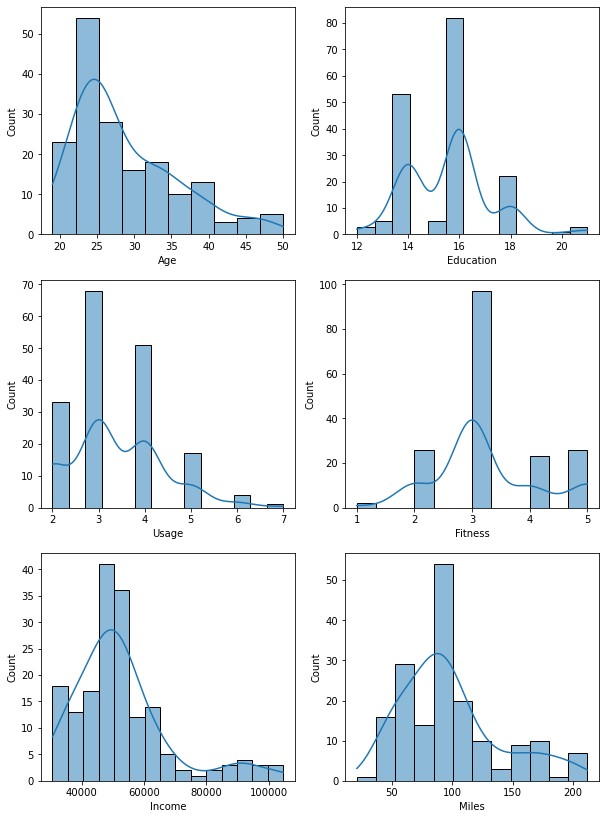

In [72]:
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])

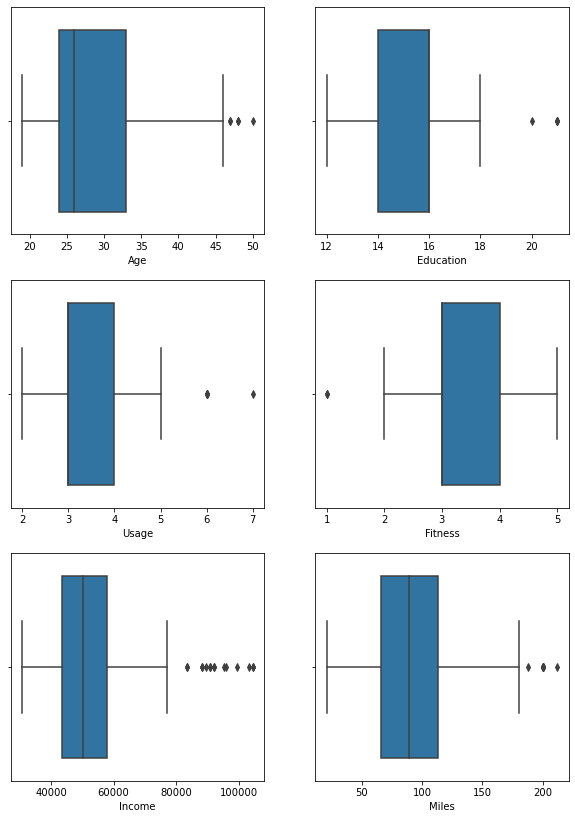

In [75]:
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient="h", ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient="h", ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient="h", ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient="h", ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient="h", ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient="h", ax=axis[2,1])
plt.show()

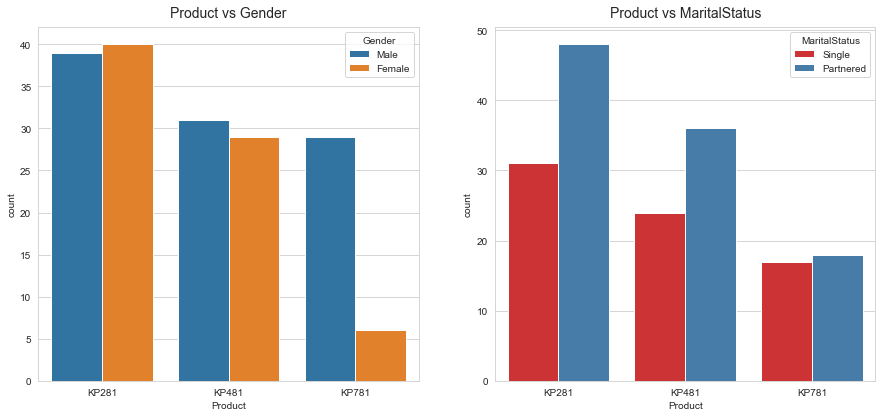

In [113]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))

sns.countplot(data=df, x='Product', hue='Gender', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus',edgecolor="1", palette='Set1', ax=axs[1])
axs[0].set_title("Product vs Gender",pad=10,fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

# Obervations
Product vs Gender
1. There's no difference in purchasing KP281 and KP481 model in reference to gender.
2. The KP781 model is mostly bought by Male customers.
#Product vs MaritalStatus
1. Partnered customers more tend to buy treadmills of all the models than the single customers.

In [ ]:
#Representing the marginal probability like - what percent of customers have purchased KP281, KP481,or KP781 
#in a table (can use pandas.crosstab here)


In [112]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)*100

value
variable      value               
Gender        Female     43.103448
              Male       56.896552
MaritalStatus Partnered  58.620690
              Single     41.379310
Product       KP281      45.402299
              KP481      34.482759
              KP781      20.114943

In [ ]:
#Check correlation among different factors using heat maps or pair plots.

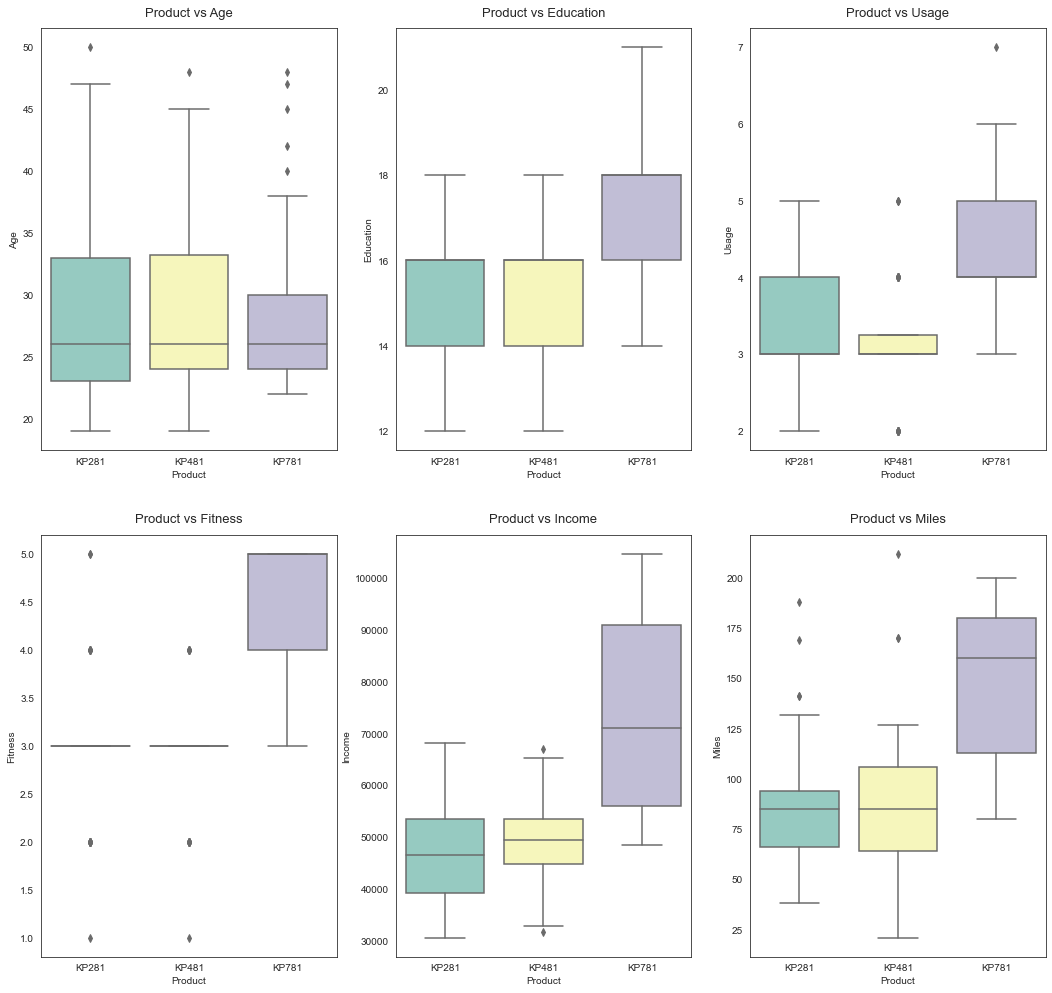

In [114]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count],ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

In [ ]:
#With all the above steps you can answer questions like: What is the probability of a male customer 
    buying a KP781 treadmill?

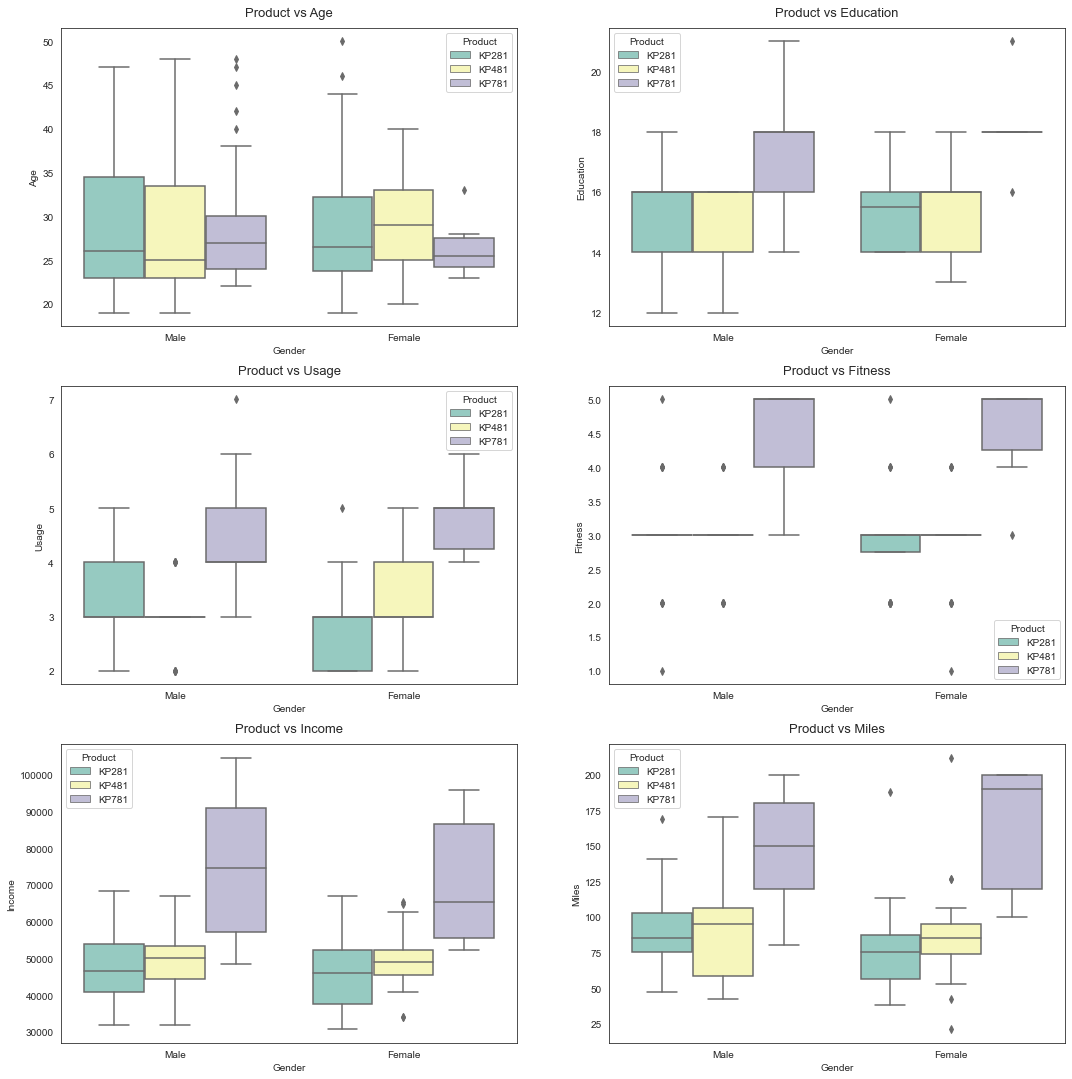

In [117]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

In [ ]:
#Probability- marginal, conditional probability.

In [119]:
# Marginal probablity
df['Product'].value_counts(normalize=True)*100

KP281    45.402299
KP481    34.482759
KP781    20.114943
Name: Product, dtype: float64

In [ ]:
#Conditional probablity-Probability of each product given Gender


In [120]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.57
P(Female): 0.43

P(KP781/Male): 0.29
P(KP481/Male): 0.31
P(KP281/Male): 0.39

P(KP781/Female): 0.08
P(KP481/Female): 0.39
P(KP281/Female): 0.53



In [ ]:
#Some recommendations and actionable insights, based on the inferences.

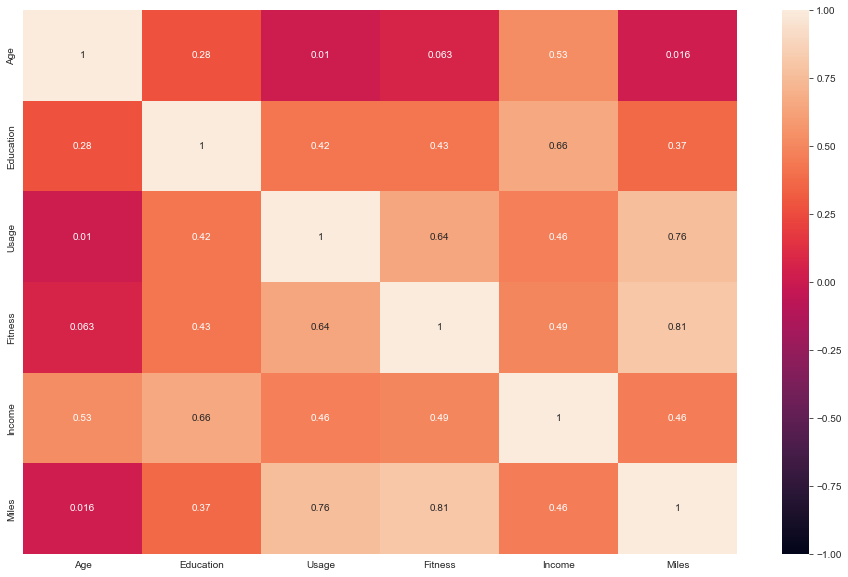

In [121]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1)
plt.show()

In [122]:
#Product - Income

pd.crosstab(index=df['Product'], columns=[df['IncomeSlab']],margins=True)

IncomeSlab,Low Income,Lower-middle income,Upper-Middle income,High income,All
Product,,,,,
KP281,7,66,6,0,79
KP481,6,47,7,0,60
KP781,0,11,11,13,35
All,13,124,24,13,174


In [123]:
#Percentage of customer with high-Income salary buying KP781 treadmill only (Conditional Probability)
round(13/13,2)*100

100.0

In [124]:
# highest number of the treadmill are purchased by Lower_middle income peoples
round(124/174,2)*100

71.0

In [125]:
#highest sale is of KP281
round(79/174,2)*100

45.0

In [126]:
#Product - Gender

pd.crosstab(index=df['Product'],columns=[df['Gender']],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,39,79
KP481,29,31,60
KP781,6,29,35
All,75,99,174


In [ ]:
#conclusions:-

In [127]:
round(99/174,2)*100  #male customer purchases are more than the female

56.99999999999999

In [128]:
round(29/35,2)*100  #KP781 is more populer in males than female

83.0

In [134]:
#Product - Fitness
pd.crosstab(index=df['Product'],columns=[df['Fitness']],margins=True)


Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,8,2,79
KP481,1,12,39,8,0,60
KP781,0,0,4,7,24,35
All,2,26,97,23,26,174


In [135]:
#percentage of people is highest with fitness level 3
round(97/174,2)*100

56.00000000000001

In [137]:
# percentage of people having max fitness level of 5 buying KP781
round(24/26,2)*100

92.0

In [142]:
#product. - age
pd.crosstab(index=df['Product'],columns=[df['AgeCategory']],margins=True)

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,5,49,19,6,79
KP481,4,31,23,2,60
KP781,0,27,4,4,35
All,9,107,46,12,174


In [143]:
#max percentage of people in 20s buy treadmill the most
round(107/174,2)*100

61.0

In [144]:
# next highest purchasing segement are 30s
round(46/174,2)*100

26.0

In [145]:
# max people in 20s buy KP281
round(49/107,2)*100

46.0